   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]
id                  0
age                 9
bp                 12
sg  

<Figure size 1000x800 with 0 Axes>

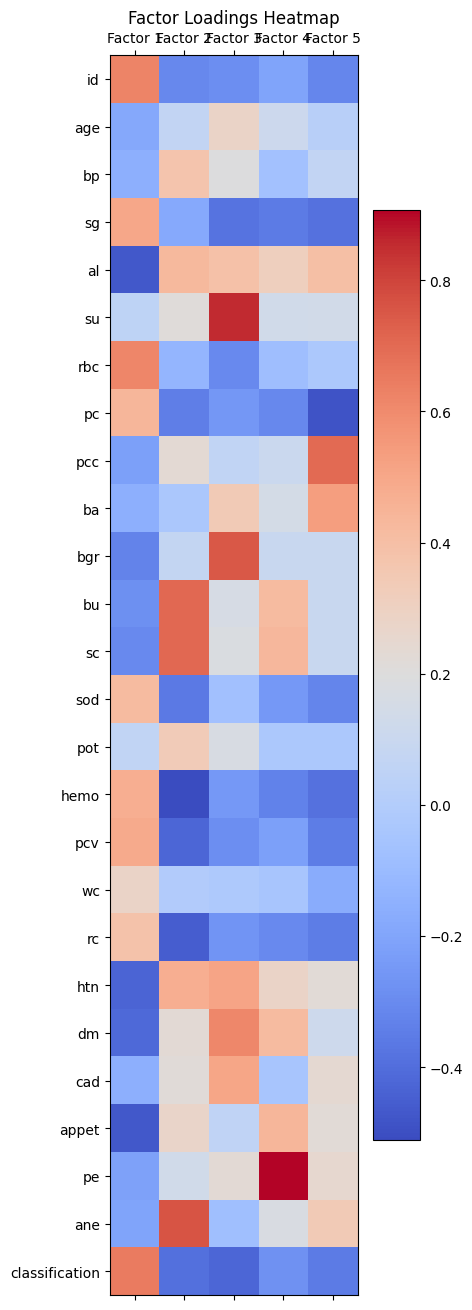

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/kidney_disease.csv')

# Display the first few rows and check for missing values
print(df.head())
print(df.isnull().sum())

# Drop rows with missing target values (if any) and handle missing data in features
df = df.dropna()

# Check data types
print(df.dtypes)

# Encode categorical columns (if any) using LabelEncoder
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Drop the 'class' column (if it's the target variable) for factor analysis
df_features = df.drop(columns=['class'], errors='ignore')

# Step 1: Standardize the data (important for factor analysis)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)

# Step 2: Perform Factor Analysis
fa = FactorAnalyzer(n_factors=5, rotation='varimax')  # Set number of factors to 5, adjust if needed
fa.fit(scaled_data)

# Step 3: Get the factor loadings
factor_loadings = fa.loadings_
print("Factor Loadings:")
print(factor_loadings)

# Step 4: Get the explained variance for each factor
variance = fa.get_factor_variance()
print("\nExplained Variance:")
print(variance)

# Step 5: Rank features based on their importance
feature_importance = pd.DataFrame(factor_loadings, index=df_features.columns)
feature_importance = feature_importance.abs().mean(axis=1)
sorted_features = feature_importance.sort_values(ascending=False)

# Display sorted features based on their importance
print("\nFeatures ranked by importance based on factor loadings:")
print(sorted_features)

# Step 6: Visualize the factor loadings
plt.figure(figsize=(10, 8))
plt.matshow(factor_loadings, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Factor Loadings Heatmap")
plt.xticks(range(factor_loadings.shape[1]), ['Factor ' + str(i+1) for i in range(factor_loadings.shape[1])])
plt.yticks(range(factor_loadings.shape[0]), df_features.columns)
plt.show()
